<a href="https://colab.research.google.com/github/Roipp16/Health-Data-Science-Repo/blob/main/stroke_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
data= pd.read_csv('/stroke.csv')
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Crear las variables dummies y codificar las columnas de texto
data = pd.get_dummies(data, columns=['smoking_status'], drop_first=True)

# Convertir las columnas de tipo objeto a valores numéricos con LabelEncoder
for col in data.select_dtypes(include='object').columns:
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))

# Eliminar filas con NaN en el dataset
data = data.dropna()

# Separar X e y
X = data.drop("stroke", axis=1)
y = data["stroke"]

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9198 - auc: 0.5076 - loss: 0.3662 - val_accuracy: 0.9580 - val_auc: 0.7166 - val_loss: 0.1594
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9549 - auc: 0.6732 - loss: 0.1835 - val_accuracy: 0.9580 - val_auc: 0.8193 - val_loss: 0.1453
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9603 - auc: 0.7188 - loss: 0.1568 - val_accuracy: 0.9580 - val_auc: 0.8385 - val_loss: 0.1415
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9577 - auc: 0.7644 - loss: 0.1584 - val_accuracy: 0.9580 - val_auc: 0.8426 - val_loss: 0.1409
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9550 - auc: 0.8208 - loss: 0.1509 - val_accuracy: 0.9580 - val_auc: 0.8512 - val_loss: 0.1387
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9612 - auc: 0.7859 - loss: 0.1398 - val_accuracy: 0.9580 - val_auc: 0.8529 - val_loss: 0.1387
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - 

In [ ]:
loss, accuracy, auc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f} - AUC: {auc:.4f}")
#not a good model since AUC = 0

Test Accuracy: 0.9552 - AUC: 0.7416


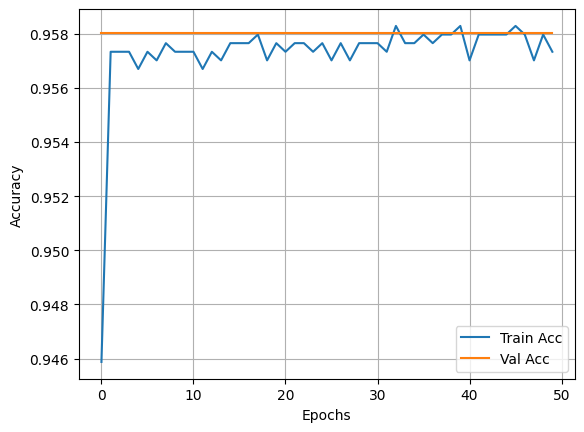

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escalar los datos antes de aplicar PCA (porque PCA es sensible a la escala)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA: Por ejemplo, reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Ver la cantidad de varianza explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

# Ver las primeras 2 dimensiones (componentes principales)
print("Datos después de PCA:", X_pca)

Varianza explicada por cada componente: [0.1970007  0.11181567]
Datos después de PCA: [[ 3.01910822 -2.89000025]
 [ 2.1939214   0.12565871]
 [ 1.12557249 -0.87592935]
 ...
 [-0.25366955  1.57163172]
 [ 0.91546921 -1.80220091]
 [ 0.57659157  0.39635177]]


In [ ]:
print("Componentes principales (coeficientes):")
print(pca.components_)

Componentes principales (coeficientes):
[[ 0.0177522  -0.02086414  0.53121123  0.25143434  0.19028767  0.49209541
  -0.35898702  0.00590464  0.24014595  0.37442238  0.18129288  0.09841078
   0.07846738]
 [-0.01356196 -0.2789554  -0.01782284 -0.02874816 -0.21124009  0.02716163
  -0.18117112 -0.05263532 -0.09451751  0.08449147 -0.46096482  0.72320306
  -0.29718457]]


In [ ]:
X.head(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,True,False,False
